In [32]:
%matplotlib inline

from pathlib import Path
import time
from datetime import datetime

import pandas as pd
import matplotlib.pyplot as plt
import psutil

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

data_dir = Path("./")
data_path = data_dir / "data.csv"
fig_path = data_dir / "plot.png"

sleep_time = 0.1  # s

...........

KeyboardInterrupt: 

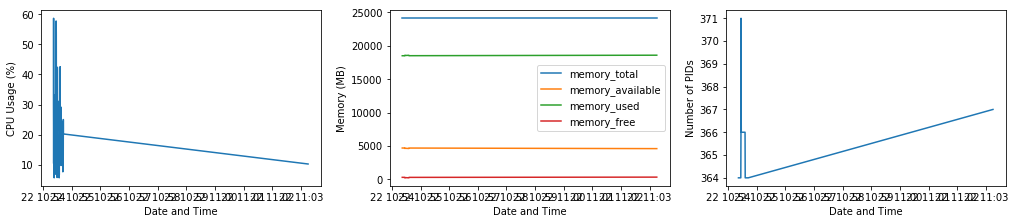

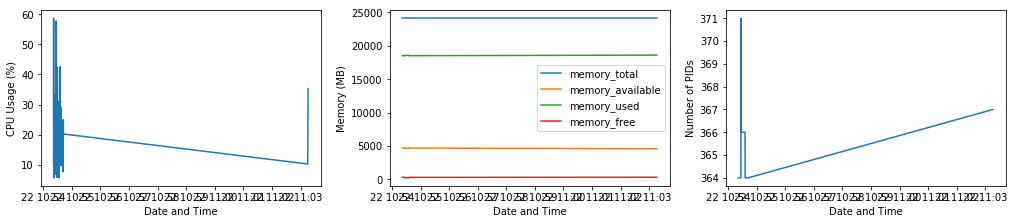

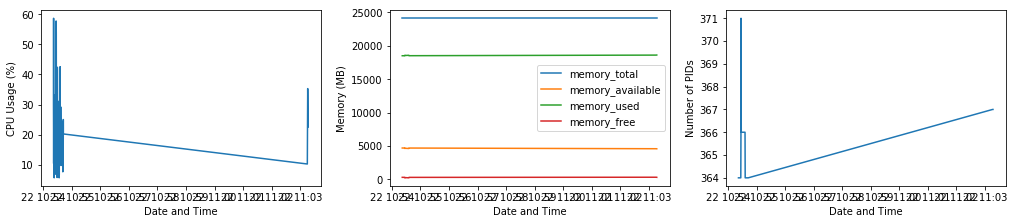

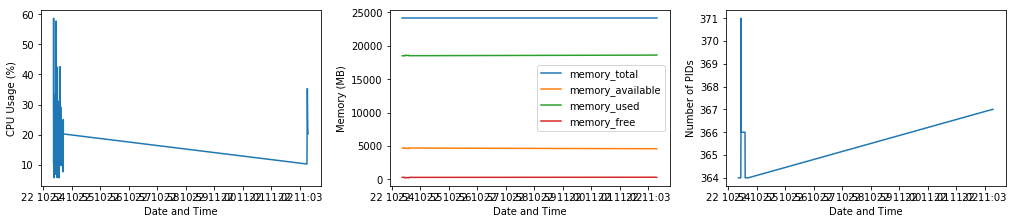

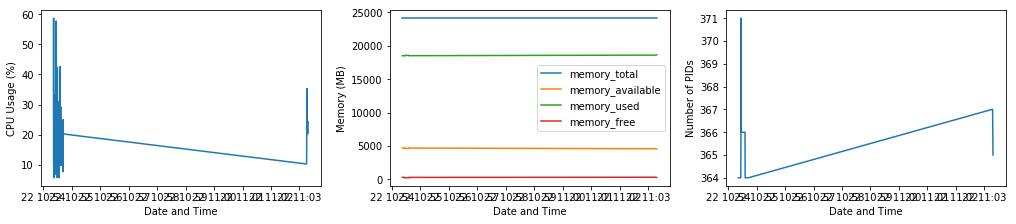

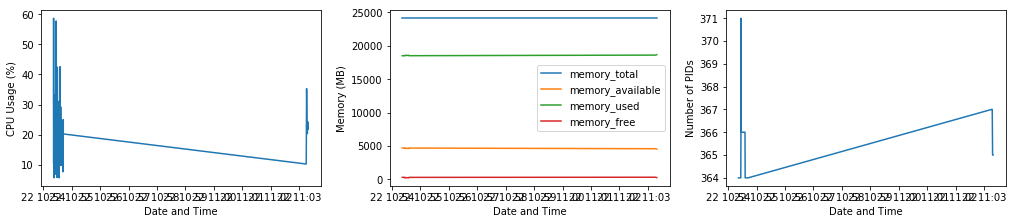

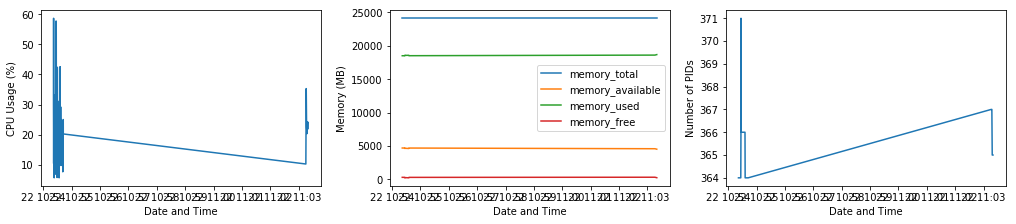

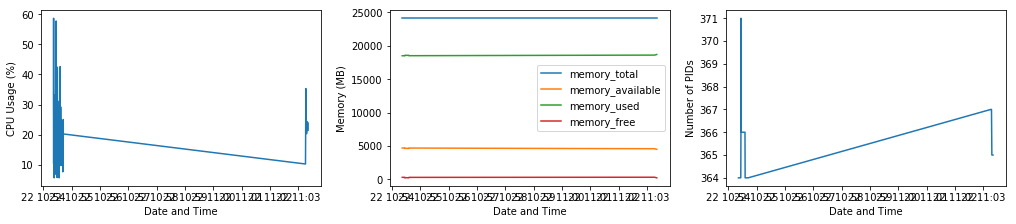

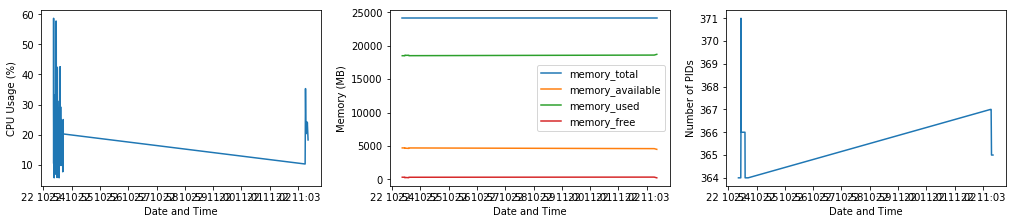

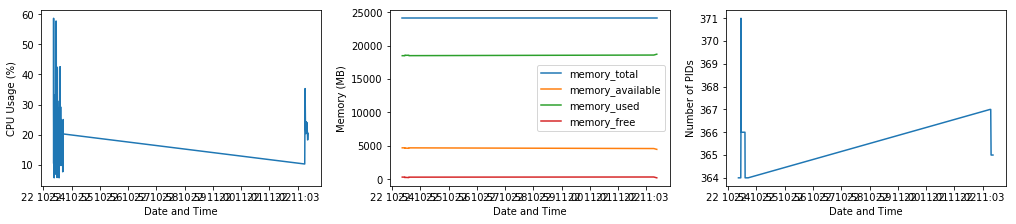

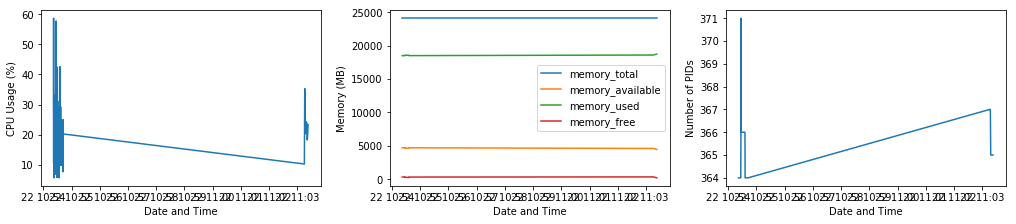

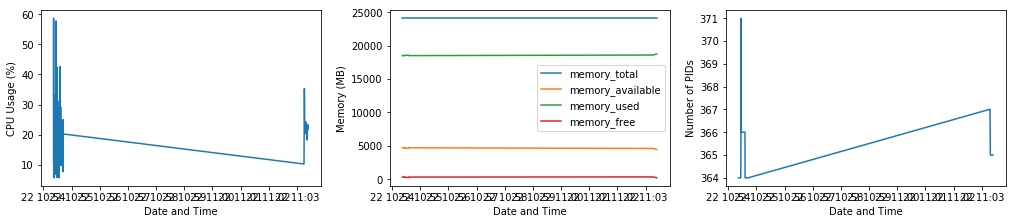

In [41]:
def plot_data(data, fig_path):
    fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(14, 3), constrained_layout=True)
    axs = list(axs.flat)

    axs[0].plot(data['datetime'], data['cpu'], label='cpu')
    axs[0].set_xlabel("Date and Time")
    axs[0].set_ylabel("CPU Usage (%)")

    features = ['memory_total', 'memory_available', 'memory_used', 'memory_free']
    for feature in features:
        axs[1].plot(data['datetime'], data[feature], label=feature)
    axs[1].set_xlabel("Date and Time")
    axs[1].set_ylabel("Memory (MB)")
    axs[1].legend()

    axs[2].plot(data['datetime'], data['n_pids'], label='n_pids')
    axs[2].set_xlabel("Date and Time")
    axs[2].set_ylabel("Number of PIDs")

    fig.savefig(fig_path, dpi=300)

def bytesToMB(value):
    return value / float(1<<20)

if not data_path.exists():
    data = pd.DataFrame()
else:
    data = pd.read_csv(data_path, parse_dates=['datetime'])

while True:
    
    datum = {}
    datum['datetime'] = datetime.now()
    
    datum['cpu'] = psutil.cpu_percent(interval=0)

    mem = psutil.virtual_memory()
    datum['memory_total'] = bytesToMB(mem.total)
    datum['memory_available'] = bytesToMB(mem.available)
    datum['memory_used'] = bytesToMB(mem.used)
    datum['memory_free'] = bytesToMB(mem.free)
    
    datum['n_pids'] = len(psutil.pids())
    
    # Save data
    data = data.append(pd.Series(datum), ignore_index=True)
    data.to_csv(data_path, index=False)
    
    # Plot
    plot_data(data, fig_path)
    
    print(".", end="")
    time.sleep(sleep_time)